# Fake News Detection Analysis Outline:

In this project news.csv is analyzed. Preprocessing of text data involves transforming raw data into an understandable format for NLP models.

 - Exploratory Data Analysis
 - Splitting data into Train and Test datasets
 - Visualizing NLP with Wordcloud
 - TfidfVectorizer
 - Fitting PassiveAggressiveClassifier and Evaluating the Model
 - Conclusion

# Exploratory Data Analysis

In [1]:
#Importing Packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [2]:
#reading the csv file
dataframe = pd.read_csv('news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#Checking the summary of the given dataframe
#and Checking if there is any blank rows
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [4]:
#checking unique label
dataframe.label.nunique()

2

In [5]:
#checking data type
dataframe.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [6]:
# Checking descriptive statistics
dataframe.describe()

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


Text(0.5, 1.0, 'Count of REAL vs. FAKE')

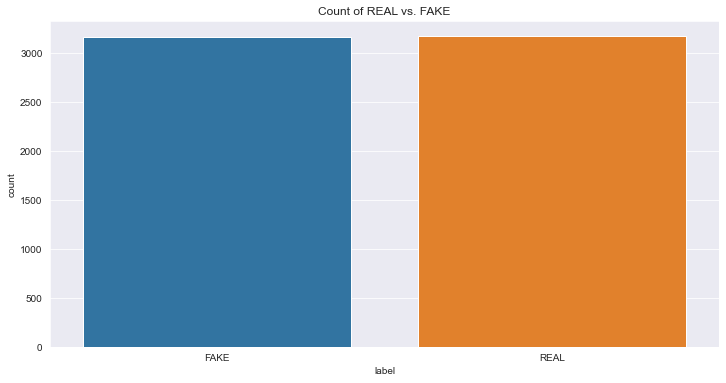

In [7]:
#Checking count for label feature
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.countplot(dataframe['label'])
plt.title('Count of REAL vs. FAKE')

Observation :

Based on the graph above, our data set is very balanced.

In [8]:
x = dataframe['text']
y = dataframe['label']

In [9]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [10]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

# Prepare Test and Train Datasets

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [12]:
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

# Visualizing NLP with Wordcloud

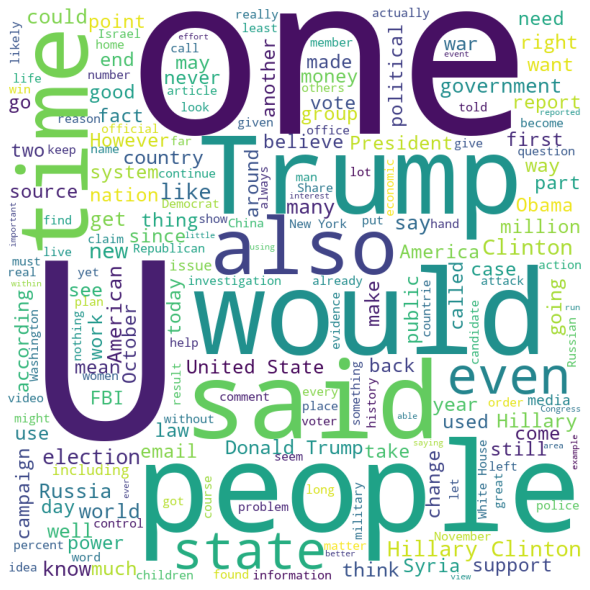

In [13]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(dataframe[dataframe['label'] == 'FAKE'].text)) 
  
# plot the word cloud for fake news data                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

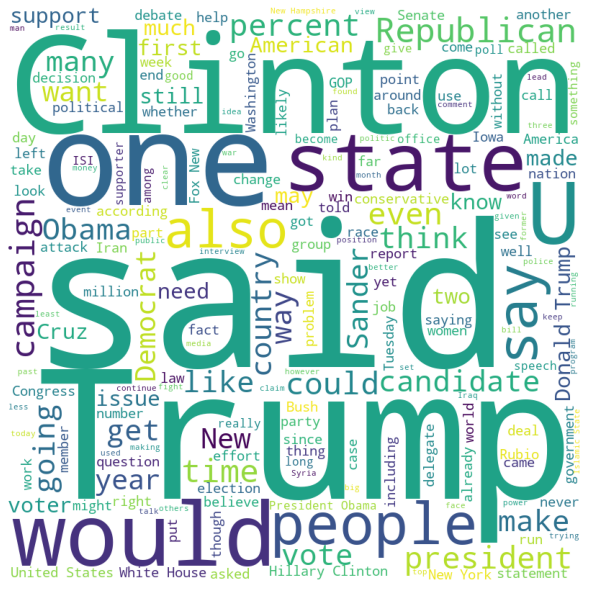

In [14]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(" ".join(dataframe[dataframe['label'] == 'REAL'].text)) 
  
# plot the WordCloud image for genuine news data                     
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

We can conclude from the word clouds that there are lot of real and fake news about Donald Trump and Clinton

# TfidfVectorizer 

Convert a collection of raw documents to a matrix of TF-IDF features

TF-IDF where TF means term frequency, and IDF means Inverse Document frequency.



In [15]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)
tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

* max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
* max_df = 25 means "ignore terms that appear in more than 25 documents".

# Fitting PassiveAggressiveClassifier and Evaluating the Model

Passive: if correct classification, keep the model; Aggressive: if incorrect classification, update to adjust to this misclassified example.

Passive-Aggressive algorithms are generally used for large-scale learning. It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms, the input data comes in sequential order and the machine learning model is updated step-by-step, as opposed to batch learning, where the entire training dataset is used at once. This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

In [16]:
#fitting the Classifier
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [17]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.21%


In [18]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)

[[569  46]
 [ 40 612]]


In [19]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [20]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [21]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [22]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [23]:
# load the model from disk
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [24]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = loaded_model.predict(vectorized_input_data)
    print(prediction)

In [25]:
fake_news_det1("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [26]:
fake_news_det1("""U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.""")

['REAL']


In [27]:
fake_news_det1("""Shocking! Michele Obama & Hillary Caught Glamorizing Date Rape Promoters First lady claims moral high ground while befriending rape-glorifying rappers Infowars.com - October 27, 2016 Comments 
Alex Jones breaks down the complete hypocrisy of Michele Obama and Hillary Clinton attacking Trump for comments he made over a decade ago while The White House is hosting and promoting rappers who boast about date raping women and selling drugs in their music. 
Rappers who have been welcomed to the White House by the Obamaâ€™s include â€œRick Ross,â€ who promotes drugging and raping woman in his song â€œU.O.N.E.O.â€ 
While attacking Trump as a sexual predator, Michelle and Hillary have further mainstreamed the degradation of women through their support of so-called musicians who attempt to normalize rape. NEWSLETTER SIGN UP Get the latest breaking news & specials from Alex Jones and the Infowars Crew. Related Articles""")

['FAKE']


In [28]:
fake_news_det1("""Killing Obama administration rules, dismantling Obamacare and pushing through tax reform are on the early to-do list.""")

['REAL']


# Conclusion

From the word clouds we can conclude that there are lot of real and fake news about Donald Trump and Clinton. We have classified our news data using PassiveAggressiveClassifier classification model. We have analysed the performance of the model using accuracy and confusion matrix. 